In [6]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


In [7]:

# [Step 1: Data Preprocessing]
# Load data, handle NaNs, and preprocess

def convert_string_to_list(item, desired_length=2):
    # Check if the item is already a number (int or float)
    if isinstance(item, (int, float)):
        return [item] * desired_length

    # Ensure the input is treated as a string
    string = str(item)

    # Replace 'nan' with '0' in the string
    string = string.replace('nan', '0')

    # Convert the string to a list
    try:
        lst = ast.literal_eval(string)
    except:
        lst = [0] * desired_length

    # Pad or truncate the list to ensure it's of the desired length
    if len(lst) < desired_length:
        lst.extend([0] * (desired_length - len(lst)))
    elif len(lst) > desired_length:
        lst = lst[:desired_length]

    return lst


# Load data
data = pd.read_csv('calculated_data.csv')

# Apply the conversion function to 'NDVI' and 'NBR' columns
data['NDVI'] = data['NDVI'].apply(lambda x: convert_string_to_list(x))
data['NBR'] = data['NBR'].apply(lambda x: convert_string_to_list(x))

# Flatten the NDVI and NBR columns
X = np.array([np.ravel([ndvi, nbr])
             for ndvi, nbr in zip(data['NDVI'], data['NBR'])])

# Print the number of rows in the data
print("Number of rows in the data:", len(data))

# Print the size of the flattened data array
print("Size of the flattened data array:", X.shape)


Number of rows in the data: 919
Size of the flattened data array: (919, 4)


In [8]:
if not np.all(np.isfinite(X)):
    print("Non-finite values detected in X. Imputing with 0.")
    X = np.nan_to_num(X)  # Replace NaN and infinite values with 0
# Use the 'ward' method for linkage to minimize variance within clusters
Z = linkage(X, method='ward')


Non-finite values detected in X. Imputing with 0.


/Users/annabelle/Documents/NEU/CS7980/Capstone/venv/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:2843: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


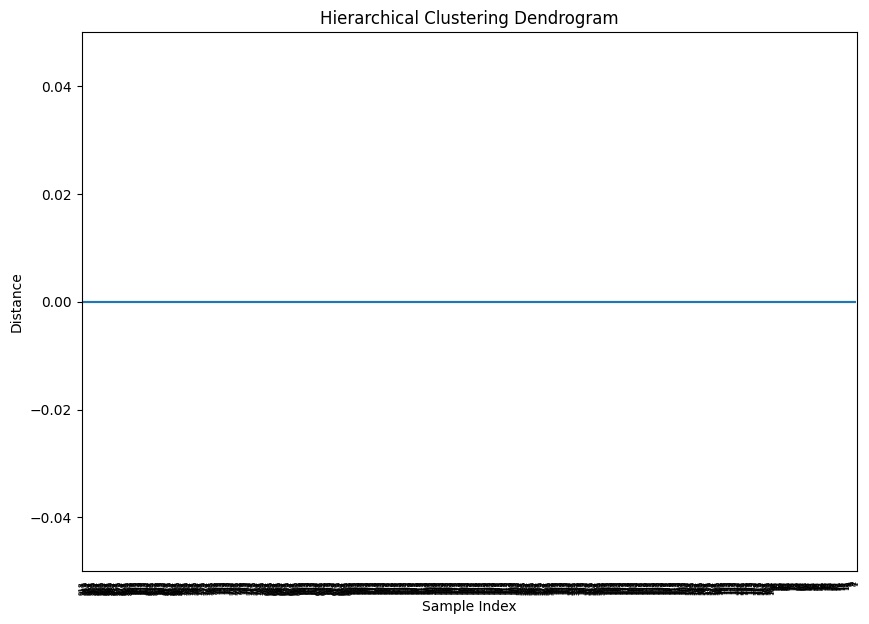

In [9]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [10]:
# Choose the number of clusters
n_clusters = 2  # Adjust this based on your analysis

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)


/Users/annabelle/Documents/NEU/CS7980/Capstone/venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


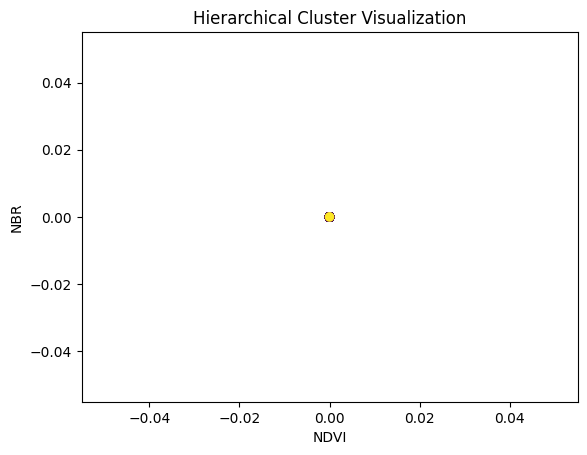

In [11]:
data['Cluster'] = labels

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('NDVI')
plt.ylabel('NBR')
plt.title('Hierarchical Cluster Visualization')
plt.show()
